In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
papers_df = pd.read_json('Papers_Metadata_6K.json')

papers_df.head()

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [101]:
users_df =pd.read_json("users.json")
users_df.head()

,userID,Location,Age
0,1,nyc,NULL
1,2,stockton,18
2,3,moscow,NULL
3,4,porto,17
4,5,farnborough,NULL


In [102]:
ratings_df =pd.read_json("User_Ratings.json")
ratings_df.head()

,userID,id,paperRating
0,112,1802.00209v1,6
1,21,1603.03827v1,9
2,12,1606.00776v2,6
3,92,1705.08142v2,2
4,52,1709.02349v2,7


In [103]:
print(ratings_df.shape)
print(list(ratings_df.columns))

(999, 3)
['userID', 'id', 'paperRating']


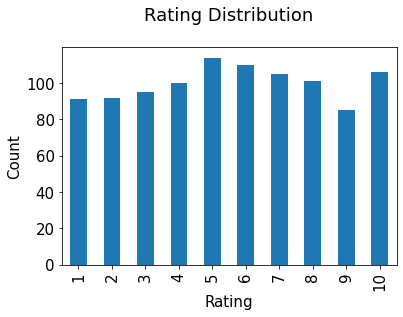

In [104]:
plt.rc("font", size=15)
ratings_df.paperRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [105]:
print(papers_df.shape)
print(list(papers_df.columns))

(6000, 9)
['author', 'day', 'id', 'link', 'month', 'summary', 'tag', 'title', 'year']


In [106]:
print(users_df.shape)
print(list(users_df.columns))

(267, 3)
['userID', 'Location', 'Age']


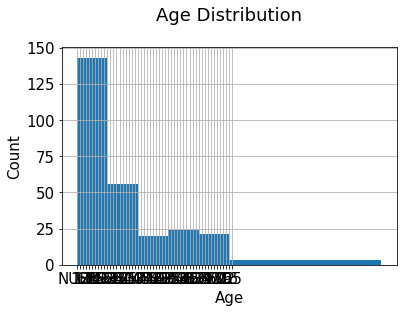

In [107]:
users_df.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [108]:
rating_count = pd.DataFrame(ratings_df.groupby('id')['paperRating'].count())
rating_count.sort_values('paperRating', ascending=False).head()

,paperRating
id,
0812.0743v2,1
1610.03761v3,1
1609.06492v1,1
1609.06666v2,1
1609.07042v4,1


In [109]:
most_rated_books = pd.DataFrame(['0812.0743v2', '1610.03761v3', '1609.06492v1', '1609.06666v2', '1609.07042v4'], index=np.arange(5), columns = ['id'])
most_rated_books_summary = pd.merge(most_rated_books, papers_df, on='id')
most_rated_books_summary

,id,author,day,link,month,summary,tag,title,year
0,0812.0743v2,"[{'name': 'Qiang Li'}, {'name': 'Yan He'}, {'n...",3,"[{'rel': 'related', 'href': 'http://dx.doi.org...",12,Enormous successes have been made by quantum a...,"[{'term': 'cs.LG', 'scheme': 'http://arxiv.org...",A Novel Clustering Algorithm Based on Quantum ...,2008
1,1610.03761v3,"[{'name': 'Shehroz S. Khan'}, {'name': 'Babak ...",12,"[{'rel': 'related', 'href': 'http://dx.doi.org...",10,A fall is an abnormal activity that occurs rar...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Detecting Unseen Falls from Wearable Devices u...,2016
2,1609.06492v1,"[{'name': 'Darko Brodic'}, {'name': 'Alessia A...",21,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,The paper introduces a new method for discrimi...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Document Image Coding and Clustering for Scrip...,2016
3,1609.06666v2,"[{'name': 'Martin Engelcke'}, {'name': 'Dushya...",21,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,This paper proposes a computationally efficien...,"[{'term': 'cs.RO', 'scheme': 'http://arxiv.org...",Vote3Deep: Fast Object Detection in 3D Point C...,2016
4,1609.07042v4,"[{'name': 'Xiang Xiang'}, {'name': 'Trac D. Tr...",22,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,"In this paper, we deal with two challenges for...","[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Pose-Selective Max Pooling for Measuring Simil...,2016


In [110]:
average_rating = pd.DataFrame(ratings_df.groupby('id')['paperRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings_df.groupby('id')['paperRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,paperRating,ratingCount
id,,
0812.0743v2,1,1
1610.03761v3,7,1
1609.06492v1,7,1
1609.06666v2,10,1
1609.07042v4,6,1


In [111]:
counts1 = ratings_df['userID'].value_counts()
ratings_df = ratings_df[ratings_df['userID'].isin(counts1[counts1 >= 1].index)]
counts = ratings_df['paperRating'].value_counts()
ratings_df = ratings_df[ratings_df['paperRating'].isin(counts[counts >= 1].index)]

In [114]:
ratings_pivot = ratings_df.pivot(index='userID', columns='id').paperRating
userID = ratings_pivot.index
id = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(199, 999)


id,0812.0743v2,0911.5372v1,1004.4965v1,1006.1346v2,1007.2449v1,1008.1566v5,1008.1643v2,1010.3460v2,1102.2739v1,1103.4487v1,...,1802.09914v1,1803.00094v1,1803.01686v1,1803.02544v2,1803.03232v1,1803.03692v1,1803.05407v1,1803.06959v1,1803.07679v1,1803.08240v1
userID,,,,,,,,,,,,,,,,,,,,,
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [115]:
bones_ratings = ratings_pivot['1604.04378v1']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=1].sort_values('pearsonR', ascending=False).head(10)

/home/emine/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/emine/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingCount
id,,


In [64]:
papers_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  index=np.arange(9), columns=['id'])
corr_papers = pd.merge(papers_corr_to_bones, papers_df, on='id')
corr_papers

,id,author,day,link,month,summary,tag,title,year


In [65]:
combine_paper_rating = pd.merge(ratings_df, papers_df, on='id')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_paper_rating = combine_paer_rating.drop(columns, axis=1)
combine_paper_rating.head()

NameError: name 'combine_paer_rating' is not defined

In [66]:
combine_paper_rating = combine_paper_rating.dropna(axis = 0, subset = ['title'])

paper_ratingCount = (combine_paper_rating.
     groupby(by = ['title'])['paperRating'].
     count().
     reset_index().
     rename(columns = {'paperRating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
paper_ratingCount.head()

,title,totalRatingCount


In [ ]:
rating_with_totalRatingCount = combine_paper_rating.merge(paper_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

In [67]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(paper_ratingCount['totalRatingCount'].describe())

count   0.000
mean      nan
std       nan
min       nan
25%       nan
50%       nan
75%       nan
max       nan
Name: totalRatingCount, dtype: float64


In [68]:
print(paper_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900   nan
0.910   nan
0.920   nan
0.930   nan
0.940   nan
0.950   nan
0.960   nan
0.970   nan
0.980   nan
0.990   nan
Name: totalRatingCount, dtype: float64


In [69]:
popularity_threshold = 50
rating_popular_paper = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_paper.head()

,userID,id,paperRating,link,month,summary,tag,title,year,totalRatingCount


In [70]:
rating_popular_paper.shape

(0, 10)

In [71]:
from scipy.sparse import csr_matrix
rating_popular_paper = rating_popular_paper.drop_duplicates(['userID', 'title'])
rating_popular_paper_pivot = rating_popular_paper.pivot(index = 'title', columns = 'userID', values = 'paperRating').fillna(0)
rating_popular_paper_matrix = csr_matrix(rating_popular_paper_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_paper_matrix)

ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.

In [72]:
rating_popular_paper_pivot.iloc[query_index,:].values.reshape(1,-1)

NameError: name 'query_index' is not defined

In [73]:
query_index = np.random.choice(rating_popular_paper_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(rating_popular_paper_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)



ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
rating_popular_paper_pivot.index[query_index]

In [74]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_paper_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_paper_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

NameError: name 'distances' is not defined